In [1]:
import numpy as np
import astropy.units as u
import os
import re

# global variables

In [12]:
masses_in_Emass = [12]
fenvs = [0.1]
cwd = os.getcwd()
# cwd_linstyle = re.sub("C:\\","\\/mnt\/c\/",cwd)
# cwd_linstyle = re.sub("\\\\","\/",cwd_linstyle)
print("masses in Emass = ", masses_in_Emass)
print("fenvs = ", fenvs)
# print("cwd_linstyle = ", cwd_linstyle)
print("cwd = ", cwd)

masses in Emass =  [12]
fenvs =  [0.1]
cwd =  C:\Users\ambar\Documents\GitHub\eia_lab2


# 2 a

In [21]:
# print certain lines of the file that we use as base to edit and create files for different models
with open('inlist_2a_evolve') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[29], lines[53])
    f.close

      saved_model_name = "planet_1d_setS_15ME_0.1_9.0.mod"
       save_model_filename = "planet_2a_evolve_15ME_0.1_9.0.mod"
       pause_before_terminate = .true. ! lets you examine the final pgstar window when run terminates
 	star_history_name = "history_2a_evolve_15ME_0.1_9.0"



In [22]:
# create a list of arrays with all the lines of the files we need to write
# and a list of filenames to save the files with
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_2a_evolve') as f:
            lines = f.readlines()
            #saved_model_name = "planet_1d_setS_15ME_0.1_9.0.mod"
            lines[7] = "\tsaved_model_name = \"planet_1d_setS_"+str(mass)+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_2a_evolve_"+str(mass)+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[29] = "\tpause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates"
            lines[53] = "\tstar_history_name = \"history_planet_2a_evolve_"+str(mass)+"ME_"+str(fenv)+"_9.0\"\n"
            files_to_write.append(lines)
            fnames.append("inlist_2a_evolve_"+str(mass)+"ME_"+str(fenv)+"_9.0")
            f.close
        print(fnames[-1])
        print("\n")

inlist_2a_evolve_12ME_0.1_9.0




In [23]:
# check if the lists have been updated and saved correctly
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][29],files_to_write[-1][53])

	saved_model_name = "planet_1d_setS_12ME_0.1_9.0.mod"
 	save_model_filename = "planet_2a_evolve_12ME_0.1_9.0.mod"
 	pause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates 	star_history_name = "history_planet_2a_evolve_12ME_0.1_9.0"



In [24]:
# write out to files
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [25]:
# make execution script
'''steps:
    - add the #!/bin line that makes the file executable
    - loop over the filenames that we need to run and write script for each in the following steps
        1. rename to inlist
        2. clean
        3. make
        4. run
        5. rename to previous name
        6. create a copy of log folder with unique name
        7. display the contents of the directory
'''

script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [26]:
# if working remotely, this command helps copy the right files to remote from local,
# might have to edit the directories to suit yourself

namestring = "script_2a "
for n in fnames:
    namestring = namestring + n + " "

print("scp "+namestring+"qadeer@student62.strw.leidenuniv.nl:/data2/qadeer/eia2022/eia_lab2/")

scp script_2a inlist_2a_evolve_12ME_0.1_9.0 qadeer@student62.strw.leidenuniv.nl:/data2/qadeer/eia2022/eia_lab2/


In [27]:
# write out to the bash script to a txt file
with open('script_2a.sh','w') as f:
    f.writelines(script)
    f.close

# 2 b

In [3]:
# Calculate F at earth from sun
# using earth's semi major axis = 149,597,887.5 km
a_earth = 149597887.5 * u.km
a_earth_cgs = a_earth.cgs
Lsun = 1 * u.L_sun
Lsun_cgs = Lsun.cgs
print(Lsun_cgs, a_earth_cgs,sep = '\n')

def calc_F_at_a(L = Lsun_cgs,a = a_earth_cgs):
    '''for an input L and a, calculates F using F = L / (4*pi*(a^2))'''
    return(L/(4*np.pi*(a**2)))

F_earth_cgs = calc_F_at_a()
print("calculated F for earth = ", F_earth_cgs)

3.828000000000001e+33 erg / s
14959788750000.0 cm
calculated F for earth =  1361166.1596877435 erg / (cm2 s)


In [4]:
f_list = [10,100] # list of multiples we want
F_list = F_earth_cgs*f_list # list of fluxes we want   

In [5]:
F_list

<Quantity [1.36116616e+07, 1.36116616e+08] erg / (cm2 s)>

In [6]:
# print certain lines of the file that we use as base to edit and create files for different models
with open('inlist_2b_relaxsurfheat') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[13], lines[19], lines[32], lines[51])
    f.close

      saved_model_name = "planet_2a_evolve_15ME_0.1_9.0.mod"
       save_model_filename = "planet_2b_relaxsurfheat_15ME_0.1_9.0.mod"
       relax_to_this_irrad_flux = 1.d7 !  erg s^-1 cm^-2
       irrad_col_depth =  3.d2 !  g cm^-2
       pause_before_terminate = .true. ! lets you examine the final pgstar window when run terminates
 	star_history_name = "history_2c_relaxsurfheat_15ME_0.1_9.0"



In [17]:
# create a list of arrays with all the lines of the files we need to write
# and a list of filenames to save the files with
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        for k,flux in enumerate(F_list):
            with open('inlist_2b_relaxsurfheat') as f:
                lines = f.readlines()
                lines[7] = "\tsaved_model_name = \"planet_2a_evolve_"+str(mass)+"ME_"+str(fenv)+"_9.0.mod\"\n"
                lines[10] = "\tsave_model_filename = \"planet_2b_relaxsurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth.mod\"\n"
                lines[13] = "\trelax_to_this_irrad_flux = "+str(flux.value)+" !  erg s^-1 cm^-2\n"
                lines[19] = "\tirrad_col_depth =  3.d2 !  g cm^-2\n"
                lines[32] = "\tpause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates\n"
                lines[51] = "\tstar_history_name = \"history_2b_relaxsurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth\"\n"
                files_to_write.append(lines)
                fnames.append("inlist_2b_relaxsurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth")
                f.close
            print(fnames[-1])
            print("\n")

inlist_2b_relaxsurfheat_12ME_0.1_9.0_10Fearth


inlist_2b_relaxsurfheat_12ME_0.1_9.0_100Fearth




In [18]:
# check if the lists have been updated and saved correctly
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][13],files_to_write[-1][19],files_to_write[-1][32],files_to_write[-1][51])

	saved_model_name = "planet_2a_evolve_12ME_0.1_9.0.mod"
 	save_model_filename = "planet_2b_relaxsurfheat_12ME_0.1_9.0_100Fearth.mod"
 	relax_to_this_irrad_flux = 136116615.96877435 !  erg s^-1 cm^-2
 	irrad_col_depth =  3.d2 !  g cm^-2
 	pause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates
 	star_history_name = "history_2b_relaxsurfheat_12ME_0.1_9.0_100Fearth"



In [19]:
# write out to files
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [20]:
# make execution script
'''steps:
    - add the #!/bin line that makes the file executable
    - loop over the filenames that we need to run and write script for each in the following steps
        1. rename to inlist
        2. clean
        3. make
        4. run
        5. rename to previous name
        6. create a copy of log folder with unique name
        7. display the contents of the directory
'''

script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [21]:
# write out to the bash script to a txt file
with open('script_2b.sh','w') as f:
    f.writelines(script)
    f.close

In [26]:
# lastly, calculate the semimajor axes for the two planets evolved here
def calc_a_at_F(L = Lsun_cgs,F = F_earth_cgs):
    '''for an input F and L, calculates a using a = np.sqrt(L / (4*pi*F))'''
    return(np.sqrt(L/(4*np.pi*F)))

a_list = calc_a_at_F(F = F_list)
print("The semi-major axes are respectively : ",a_list)
print("As compared to Earth at : ",calc_a_at_F())

The semi-major axes are respectively :  [4.73070058e+12 1.49597888e+12] cm
As compared to Earth at :  14959788750000.0 cm


# 2 c

In [37]:
# print certain lines of the file that we use as base to edit and create files for different models
with open('inlist_2c_evosurfheat') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[20], lines[30], lines[31], lines[35], lines[44])
    f.close

      saved_model_name = "planet_2b_relaxsurfheat_15ME_0.1_9.0.mod"
       save_model_filename = "planet_2c_evosurfheat_15ME_0.1_9.0.mod"
       pause_before_terminate = .true. ! lets you examine the final pgstar window when run terminates
 	column_depth_for_irradiation = 3.d2 !cm^2/g
         irradiation_flux = 1.d7 !erg/cm^2/s ! day side flux, stellar irradiance incident on planet
 	max_age = 5.0d9
 	star_history_name = "history_2c_surfheat_15ME_0.1_9.0"



In [43]:
# create a list of arrays with all the lines of the files we need to write
# and a list of filenames to save the files with
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        for k,flux in enumerate(F_list):
            with open('inlist_2c_evosurfheat') as f:
                lines = f.readlines()
                lines[7] = "\tsaved_model_name = \"planet_2b_relaxsurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth.mod\"\n"
                lines[10] = "\tsave_model_filename = \"planet_2c_evosurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth.mod\"\n"
                lines[20] = "\tpause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates\n"
#                 lines[30] = "\tirrad_col_depth =  3.d2 !  g cm^-2\n"
                lines[31] = "\tirradiation_flux = "+str(flux.value)+" !  erg s^-1 cm^-2\n"
#                 lines[35] = "\tmax_age = 5.0d9\n"
                lines[44] = "\tstar_history_name = \"history_2c_evosurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth\"\n"
                files_to_write.append(lines)
                fnames.append("inlist_2c_evosurfheat_"+str(mass)+"ME_"+str(fenv)+"_9.0_"+str(f_list[k])+"Fearth")
                f.close
            print(fnames[-1])
            print("\n")

inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth


inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth




In [44]:
# check if the lists have been updated and saved correctly
# save_model_filename = "planet_2b_relaxsurfheat_12ME_0.1_9.0_100Fearth.mod"
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][20],files_to_write[-1][30],files_to_write[-1][31],files_to_write[-1][35],files_to_write[-1][44])

	saved_model_name = "planet_2b_relaxsurfheat_12ME_0.1_9.0_100Fearth.mod"
 	save_model_filename = "planet_2c_evosurfheat_12ME_0.1_9.0_100Fearth.mod"
 	pause_before_terminate = .false. ! lets you examine the final pgstar window when run terminates
 	column_depth_for_irradiation = 3.d2 !cm^2/g
 	irradiation_flux = 136116615.96877435 !  erg s^-1 cm^-2
 	max_age = 5.0d9
 	star_history_name = "history_2c_evosurfheat_12ME_0.1_9.0_100Fearth"



In [45]:
# write out to files
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [46]:
# make execution script
'''steps:
    - add the #!/bin line that makes the file executable
    - loop over the filenames that we need to run and write script for each in the following steps
        1. rename to inlist
        2. clean
        3. make
        4. run
        5. rename to previous name
        6. create a copy of log folder with unique name
        7. display the contents of the directory
'''

script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [47]:
# write out to the bash script to a txt file
with open('script_2c.sh','w') as f:
    f.writelines(script)
    f.close

# Plotting

In [ ]:
import os

In [47]:
os.getcwd()

'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2'

In [53]:
base = os.path.normpath(os.pardir)
lab1dir = base+os.sep+"eia_lab1"
lab1dir

'..\\eia_lab1'

In [ ]:
# one showing the evoluEon of the radius of each planet with Eme
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [54]:
history_files = glob.glob(cwd+"\\\\LOGS*\\\\history*2c*")
profile_files_100 = glob.glob(cwd+"\\\\LOGS*2c*100Fearth*\\\\profile*.data")
profile_files_10 = glob.glob(cwd+"\\\\LOGS*2c*10Fearth*\\\\profile*.data")
history_files = glob.glob(cwd+"\\\\LOGS*\\\\history*2c*")

In [55]:
profile_files_10

['C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth\\profile1.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth\\profile2.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth\\profile3.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth\\profile4.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_10Fearth\\profile5.data']

In [56]:
profile_files_100

['C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth\\profile1.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth\\profile2.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth\\profile3.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth\\profile4.data',
 'C:\\Users\\ambar\\Documents\\GitHub\\eia_lab2\\LOGS_inlist_2c_evosurfheat_12ME_0.1_9.0_100Fearth\\profile5.data']

In [65]:
history_files_1e = glob.glob(lab1dir+"\\\\LOGS*1e*\\\\history*1e*12ME*0.1*")

In [66]:
history_files_1e

['..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\history_1e_evolve_12ME_0.1_9.0']

In [70]:
profile_files_1e = glob.glob(lab1dir+"\\\\LOGS*1e*12ME*0.1*\\\\profile*.data")

In [91]:
profile_files_1e

['..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile1.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile2.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile3.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile4.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile5.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile6.data',
 '..\\eia_lab1\\LOGS_inlist_1e_evolve_12ME_0.1_9.0\\profile7.data']

In [77]:
history10 = pd.read_table(history_files[0],sep = '\s+', header = 4)
history100 = pd.read_table(history_files[1],sep = '\s+', header = 4)
history1e = pd.read_table(history_files_1e[0],sep = '\s+', header = 4)
history10.columns

Index(['log_star_age', 'luminosity', 'radius', 'star_mass',
       'surface_cell_temperature', 'conv_mx1_top_r', 'conv_mx1_top',
       'center_entropy', 'max_entropy', 'log_L', 'log_Teff', 'log_center_T',
       'log_center_Rho', 'log_R'],
      dtype='object')

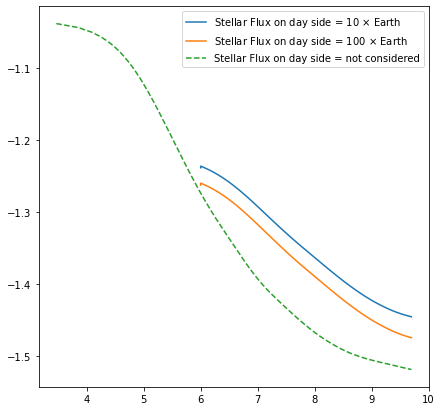

In [89]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax.plot(history10['log_star_age'],history10['log_R'],label = r'Stellar Flux on day side = 10 $\times$ Earth')
ax.plot(history100['log_star_age'],history100['log_R'],label = r'Stellar Flux on day side = 100 $\times$ Earth')
ax.plot(history1e['log_star_age'],history1e['log_R'],label = r'Stellar Flux on day side = not considered', linestyle = "--")
ax.set_title("Evolution of the planet radii")
plt.legend()
plt.show()

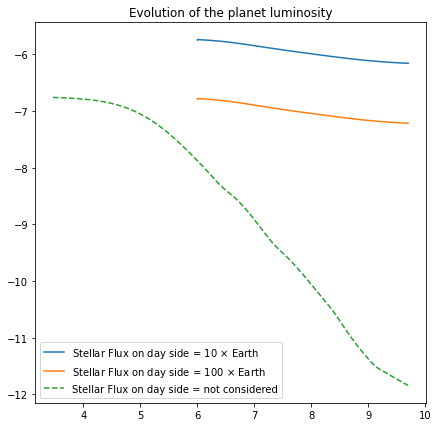

In [90]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax.plot(history10['log_star_age'],history10['log_L'],label = r'Stellar Flux on day side = 10 $\times$ Earth')
ax.plot(history100['log_star_age'],history100['log_L'],label = r'Stellar Flux on day side = 100 $\times$ Earth')
ax.plot(history1e['log_star_age'],history1e['log_L'],label = r'Stellar Flux on day side = not considered', linestyle = "--")
ax.set_title("Evolution of the planet luminosity")
plt.legend()
plt.show()

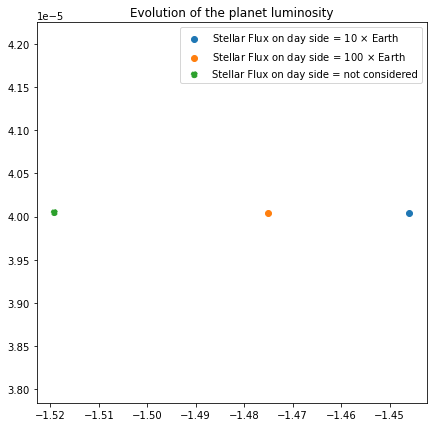

In [94]:
fig,ax = plt.subplots(1,1,figsize = (7,7))
ax.scatter(history10['log_R'].iloc[-1],history10['star_mass'].iloc[-1],label = r'Stellar Flux on day side = 10 $\times$ Earth')
ax.scatter(history100['log_R'].iloc[-1],history100['star_mass'].iloc[-1],label = r'Stellar Flux on day side = 100 $\times$ Earth')
ax.scatter(history1e['log_R'].iloc[-1],history1e['star_mass'].iloc[-1],label = r'Stellar Flux on day side = not considered', linestyle = "--")
ax.set_title("Evolution of the planet luminosity")
plt.legend()
plt.show()

# Code from previous Lab assignment

# gather data and generate plots : we beginnen

In [6]:
# one showing the evoluEon of the radius of each planet with Eme
import pandas as pd
import matplotlib.pyplot as plt
# import mesa_reader as mr

In [266]:
masslist = np.array(["7ME","3ME","10ME","12ME","5ME","7ME","3ME","10ME","12ME","5ME"])
flist = np.array([0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1,0.01,0.1])
masslist.sort()
print(masslist)
print(flist)

['10ME' '10ME' '12ME' '12ME' '3ME' '3ME' '5ME' '5ME' '7ME' '7ME']
[0.01 0.1  0.01 0.1  0.01 0.1  0.01 0.1  0.01 0.1 ]


In [276]:
history_collection_10 = []
label_list = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        hist = pd.read_table('eialab3/Lab1/LOGS_inlist_1e_evolve_'+str(m_multiples[i])+'ME_'+str(fenv)+'_9.0/history_1e_evolve_'+str(m_multiples[i])+'ME_'+str(fenv)+'_9.0',sep = '\s+', header = 4)
        label_list.append("core mass = "+str(m_multiples[i])+r'M$_\oplus$'+" f$_{env}$ = "+str(fenv))
        history_collection.append(hist)
# history_collection
label_list

['core mass = 3M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 5M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 7M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 10M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 12M$_\\oplus$ f$_{env}$ = 0.1',
 'core mass = 3M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 5M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 7M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 10M$_\\oplus$ f$_{env}$ = 0.01',
 'core mass = 12M$_\\oplus$ f$_{env}$ = 0.01']

In [281]:
history_collection[0].columns

Index(['log_star_age', 'luminosity', 'radius', 'star_mass',
       'surface_cell_temperature', 'conv_mx1_top_r', 'conv_mx1_top',
       'center_entropy', 'max_entropy', 'log_L', 'log_Teff', 'log_center_T',
       'log_center_Rho', 'log_R'],
      dtype='object')

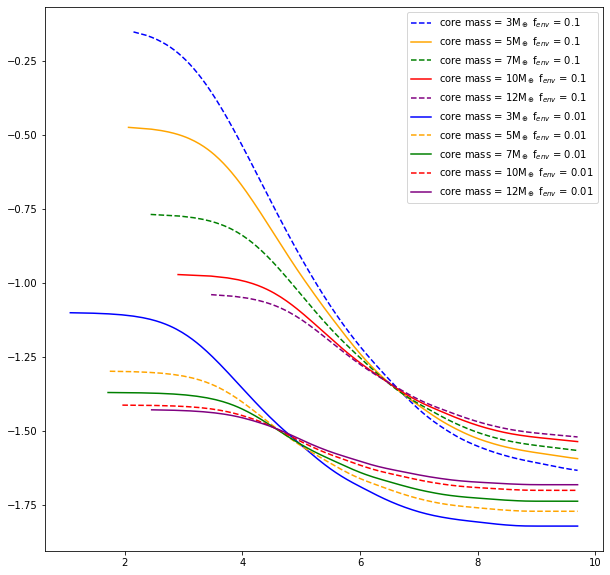

In [280]:
fig = plt.figure(figsize = (10,10))
colorlist = ['b','orange','green', 'r','purple','b','orange','green', 'r','purple']
for i,hist in enumerate(history_collection):
    R_in_cm = prof['radius_cm']*u.cm
        R_in_Rearth = []
        for r in R_in_cm:
            R_in_Rearth.append(r.to(u.Rearth).value)
    if flist[i] == 0.01:
        p = plt.plot(hist['log_star_age'],hist['log_R'], linestyle='dashed', label = label_list[i], color = colorlist[i])
    if flist[i] == 0.1:
        plt.plot(hist['log_star_age'],hist['log_R'], label = label_list[i], color = colorlist[i])
plt.legend()
plt.xlabel('')

# Loop of inlist update sequence from Lab1 for reference

In [11]:
# print certain lines of the file that we use as base to edit and create files for different models
with open('inlist_1d_setS') as f:
    lines = f.readlines()
    print(lines[7], lines[10], lines[52])
    f.close

      saved_model_name = "planet_1c_reducemass_15ME_0.1.mod"
       save_model_filename = "planet_1d_setS_15ME_0.1_9.0.mod"
 	star_history_name = "history_1d_setS_15ME_0.1_9.0"



In [12]:
# create a list of arrays with all the lines of the files we need to write
# and a list of filenames to save the files with
files_to_write = []
fnames = []
for j,fenv in enumerate(fenvs):
    for i,mass in enumerate(masses_in_Emass):
        with open('inlist_1d_setS') as f:
            lines = f.readlines()
            lines[7] = "\tsaved_model_name = \"planet_1c_reducemass_"+str(m_multiples[i])+"ME_"+str(fenv)+".mod\"\n"
            lines[10] = "\tsave_model_filename = \"planet_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0.mod\"\n"
            lines[52] = "\tstar_history_name = \"history_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0\"\n"
            files_to_write.append(lines)
            fnames.append("inlist_1d_setS_"+str(m_multiples[i])+"ME_"+str(fenv)+"_9.0")
            f.close
        print(fnames[-1])
        print("\n")

inlist_1d_setS_3ME_0.1_9.0


inlist_1d_setS_5ME_0.1_9.0


inlist_1d_setS_7ME_0.1_9.0


inlist_1d_setS_10ME_0.1_9.0


inlist_1d_setS_12ME_0.1_9.0


inlist_1d_setS_3ME_0.01_9.0


inlist_1d_setS_5ME_0.01_9.0


inlist_1d_setS_7ME_0.01_9.0


inlist_1d_setS_10ME_0.01_9.0


inlist_1d_setS_12ME_0.01_9.0




In [17]:
# check if the lists have been updated and saved correctly
print(files_to_write[-1][7],files_to_write[-1][10],files_to_write[-1][52])

	saved_model_name = "planet_1c_reducemass_12ME_0.01.mod"
 	save_model_filename = "planet_1d_setS_12ME_0.01_9.0.mod"
 	star_history_name = "history_1d_setS_12ME_0.01_9.0"



In [13]:
# write out to files
for i,w_files in enumerate(fnames):
    with open(str(w_files),'w') as f:
        f.writelines(files_to_write[i])
        f.close

In [14]:
# make execution script
'''steps:
    - add the #!/bin line that makes the file executable
    - loop over the filenames that we need to run and write script for each in the following steps
        1. rename to inlist
        2. clean
        3. make
        4. run
        5. rename to previous name
        6. create a copy of log folder with unique name
        7. display the contents of the directory
'''

script = ["#!/bin/sh\n\n"]
for fn in fnames:
    script.append("mv "+fn+" inlist\n")
    script.append("./clean\n")
    script.append("./mk\n")
    script.append("./rn\n")
    script.append("mv "+"inlist "+fn+"\n")
    script.append("mv LOGS LOGS_"+fn+"\n")
    script.append("ls\n")

In [15]:
# if working remotely, this command helps copy the right files to remote from local,
# might have to edit the directories to suit yourself

namestring = "script_1d "
for n in fnames:
    namestring = namestring + n + " "

print("scp "+namestring+"qadeer@student33.strw.leidenuniv.nl:/home/qadeer/Desktop/eia2022/ass1/Lab1/Lab1/")

scp script_1d inlist_1d_setS_3ME_0.1_9.0 inlist_1d_setS_5ME_0.1_9.0 inlist_1d_setS_7ME_0.1_9.0 inlist_1d_setS_10ME_0.1_9.0 inlist_1d_setS_12ME_0.1_9.0 inlist_1d_setS_3ME_0.01_9.0 inlist_1d_setS_5ME_0.01_9.0 inlist_1d_setS_7ME_0.01_9.0 inlist_1d_setS_10ME_0.01_9.0 inlist_1d_setS_12ME_0.01_9.0 qadeer@student33.strw.leidenuniv.nl:/home/qadeer/Desktop/eia2022/ass1/Lab1/Lab1/


In [16]:
# write out to the bash script to a txt file
with open('script_1d.txt','w') as f:
    f.writelines(script)
    f.close